In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [209]:


filename = os.path.join(os.getcwd(), "dataframes", "actReading_11.csv")
filename2 = os.path.join(os.getcwd(), "dataframes", "scantronReading_38.csv")
filename3 = os.path.join(os.getcwd(),"dataframes", "actMath_11.csv")
filename4 = os.path.join(os.getcwd(),"dataframes", "actMath_11_encoded_df.csv")
filename5 = os.path.join(os.getcwd(), "dataframes", "scantronReading_38_encoded.csv")

actReading_11_df = pd.read_csv(filename, header = 0)
scantron_reading38 = pd.read_csv(filename2, header = 0)
actMath_11_df = pd.read_csv(filename3, header = 0)
actMath_11_encoded_df = pd.read_csv(filename4, header = 0)
scantron_reading38_encoded_df = pd.read_csv(filename5, header = 0)

Act Reading

In [210]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [211]:
print(actReading_11_df.dtypes)

studentId                 int64
is_proficient              bool
proficient_score        float64
course_ACT Review          bool
course_ACT/WK Rev.         bool
course_ACTReview.5C        bool
course_AG Communica        bool
course_AIDE-ELEM           bool
course_AIDE-LIB            bool
course_ALG I B ACCE        bool
course_ALIITRIGH/A         bool
course_ARMY LET I          bool
course_ARMY LET II         bool
course_ARMY LET III        bool
course_ARMY LET IV         bool
course_ARMYLETIVACT        bool
course_AcAdv.Baseba        bool
course_AcAdv.Basket        bool
course_AcAdv.CrossC        bool
course_AcAdv.Footb         bool
course_AcAdv.Softba        bool
course_AcAdv.Volley        bool
course_Accounting          bool
course_Adv BTA             bool
course_Advanced Agr        bool
course_Agriscience         bool
course_Alg Esntls B        bool
course_Alg II/Trig         bool
course_AlgEnrichmet        bool
course_AlgII/TrigAC        bool
course_Algebra I           bool
course_A

In [212]:
actReading_11_df.shape
actReading_11_df.columns


Index(['studentId', 'is_proficient', 'proficient_score', 'course_ACT Review',
       'course_ACT/WK Rev.', 'course_ACTReview.5C', 'course_AG Communica',
       'course_AIDE-ELEM', 'course_AIDE-LIB', 'course_ALG I B ACCE',
       ...
       'course_YearbkII9-12', 'course_Yearbook9-12', 'course_YrbkIII9-12',
       'school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading',
       'bbb_literacy'],
      dtype='object', length=241)

In [213]:
#Turn bool to 1, 0 
actReading_11_df[actReading_11_df.select_dtypes(include=['bool']).columns] = actReading_11_df.select_dtypes(include=['bool']).astype(int)


In [214]:
actReading_11_df.head(8)


,studentId,is_proficient,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,course_ARMY LET II,course_ARMY LET III,course_ARMY LET IV,course_ARMYLETIVACT,course_AcAdv.Baseba,course_AcAdv.Basket,course_AcAdv.CrossC,course_AcAdv.Footb,course_AcAdv.Softba,course_AcAdv.Volley,course_Accounting,course_Adv BTA,course_Advanced Agr,course_Agriscience,course_Alg Esntls B,course_Alg II/Trig,course_AlgEnrichmet,course_AlgII/TrigAC,course_Algebra I,course_Algebra I A,course_Algebra I B,course_Algebra II,course_AlgebraicCon,course_Anat/Physio,course_Anthropology,course_Art App,course_BAND MARCH,course_BANDCONCERT,course_BANDMARCHAUX,course_BIOLOGY ADV,course_Bak & Pstr A,course_BandConcer.5,course_BandConcer1C,course_BandMarch.5C,course_BandSymph 1C,course_Biology,course_Biology Adv,course_BullBogAdv,course_BulldogAdvi,course_Bus Finance,course_Bus Tech App,course_CABINETMAK I,course_CABINETMAKII,course_Cabntmkng I,course_Cabntmkng II,course_Career Prep,course_CareerPrep-A,course_CareerPrep-B,course_Chemistry,course_ChemistryAdv,course_Const Fin In,course_Const Frmng,course_ContempIss1C,course_Crea Writing,course_CreatWrt.5C,course_Credit Recov,course_Culinary I,course_Culinary II,course_D&TSafetyEd,course_DRIVERS ED,course_Dance 9-12,course_Digitl Dsgn,course_ESLEnrich912,course_ESLLang9-12,course_Ear/SpaceSci,course_Eng Ess 10,course_Eng Ess 11,course_Eng Gr10 Adv,course_EngGr9-CR,"course_EngLang,BS10",course_EnglGr10ACCE,course_English Gr 9,course_English Gr10,course_English Gr11,course_Enrichmt6-12,course_Enviro Sci,course_Ess II:USHis,course_Ess: E & SS,course_Ess: Phy Sci,course_EssIII:USHis,course_EssPhySci,course_EventPlan,course_FACS,course_FAM CON SC,course_Fit Life .5C,course_Fit/Cond,course_Food Inno,course_Food Nutritn,course_For/Cri Inve,course_Forestry,course_Found AAVTC,course_FrenchIACCE,course_Fund Agrisci,course_GEOM ADV,course_Geo Ess,course_Geometry,course_Geometry Adv,course_GeometryACCE,course_German1ACCES,course_Guitar,course_HEALTH 9-12,course_HEALTH ACCES,course_HISTUS1877AC,course_HS US 10 ADV,course_Health 9-12,course_HealthACCESS,course_Hosp Tourism,course_INFO SUP SVC,course_IT Fndamntls,course_IT Supp/Serv,course_Inet Mktg,course_Int Ad Desgn,course_Int Metl Fab,course_Inter Drftng,course_Intermed Agr,course_Intr Fire Sc,course_Intro Drftng,course_Jazz 1C,course_Journal1ACC,course_Journalism 1,course_LATIN 1 ACC,course_LAW IN SOCIE,course_LIFE PE 9-12,course_LIFEPE9-12.5,course_MARKET PRIN,course_MarchAux.5C,course_MarchAux1C,course_Marine Sci,course_Mktng Prin,course_Mnt Lt Rpr A,course_Mnt Lt Rpr B,course_Multimed Des,course_Multimed Pub,course_Music App,course_MusicTheatre,course_MusicTherI.5,course_MusicThry AP,course_MusicalDrama,course_Mustang Advi,course_NCCER ET1,course_NCCER ET2,course_NCCER Wldg1,course_NCCER Wldg2,course_Painting,course_Panther Adv,course_Per Finance,course_Percuss 1C,course_Phy Sci Adv,course_PhySciACCESS,course_Physical Sci,course_Piano .5C,course_Plumb/Pipe I,course_Plumb/PipeII,course_Prn Pub Serv,course_Psyc AP Acc,course_PsychACCESS,course_Psycholog.5C,course_Psychology,course_R/DinPhysics,course_RdIntrv7-12,course_Robotics App,course_SPAN II ACCE,course_SPANISH I,course_SPANISH II,course_Sociology,course_SociologyACC,course_Span2ACCESS,course_SpanIACC,course_Spanish 1,course_Spanish 2,course_Spanish 3,course_Speech 1,course_Spo&En Mktg,course_StuAiOff912,course_StudyHall912,course_TA-Partridge,course_Tech Theater,course_Theatre I,course_Theatre II,course_TmSpts,course_TmSpts-Dance,course_Tran Serv I,course_Tran Serv II,course_TranSer 11,course_TranSer El.5,course_TranSer10,course_Travl Tour I,course_US His-1877,course_USHis 1877-P,course_USHis I Adv,course_USHis I G10,course_USHis InD-P,course_USHisIG10ACC,course_VarBkbalI,course_VarBkbalII,course_VarBsbalI,course_VarBsbalII,course_VarBsblIV,course_VarCheerII,course_VarFBI,course_VarFBII,course

In [215]:
#use proficient_score as my label 
actReading_11_df_copy1 = actReading_11_df.drop(['studentId'], axis=1).copy()
actReading_11_df_copy1.head()

,is_proficient,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,course_ARMY LET II,course_ARMY LET III,course_ARMY LET IV,course_ARMYLETIVACT,course_AcAdv.Baseba,course_AcAdv.Basket,course_AcAdv.CrossC,course_AcAdv.Footb,course_AcAdv.Softba,course_AcAdv.Volley,course_Accounting,course_Adv BTA,course_Advanced Agr,course_Agriscience,course_Alg Esntls B,course_Alg II/Trig,course_AlgEnrichmet,course_AlgII/TrigAC,course_Algebra I,course_Algebra I A,course_Algebra I B,course_Algebra II,course_AlgebraicCon,course_Anat/Physio,course_Anthropology,course_Art App,course_BAND MARCH,course_BANDCONCERT,course_BANDMARCHAUX,course_BIOLOGY ADV,course_Bak & Pstr A,course_BandConcer.5,course_BandConcer1C,course_BandMarch.5C,course_BandSymph 1C,course_Biology,course_Biology Adv,course_BullBogAdv,course_BulldogAdvi,course_Bus Finance,course_Bus Tech App,course_CABINETMAK I,course_CABINETMAKII,course_Cabntmkng I,course_Cabntmkng II,course_Career Prep,course_CareerPrep-A,course_CareerPrep-B,course_Chemistry,course_ChemistryAdv,course_Const Fin In,course_Const Frmng,course_ContempIss1C,course_Crea Writing,course_CreatWrt.5C,course_Credit Recov,course_Culinary I,course_Culinary II,course_D&TSafetyEd,course_DRIVERS ED,course_Dance 9-12,course_Digitl Dsgn,course_ESLEnrich912,course_ESLLang9-12,course_Ear/SpaceSci,course_Eng Ess 10,course_Eng Ess 11,course_Eng Gr10 Adv,course_EngGr9-CR,"course_EngLang,BS10",course_EnglGr10ACCE,course_English Gr 9,course_English Gr10,course_English Gr11,course_Enrichmt6-12,course_Enviro Sci,course_Ess II:USHis,course_Ess: E & SS,course_Ess: Phy Sci,course_EssIII:USHis,course_EssPhySci,course_EventPlan,course_FACS,course_FAM CON SC,course_Fit Life .5C,course_Fit/Cond,course_Food Inno,course_Food Nutritn,course_For/Cri Inve,course_Forestry,course_Found AAVTC,course_FrenchIACCE,course_Fund Agrisci,course_GEOM ADV,course_Geo Ess,course_Geometry,course_Geometry Adv,course_GeometryACCE,course_German1ACCES,course_Guitar,course_HEALTH 9-12,course_HEALTH ACCES,course_HISTUS1877AC,course_HS US 10 ADV,course_Health 9-12,course_HealthACCESS,course_Hosp Tourism,course_INFO SUP SVC,course_IT Fndamntls,course_IT Supp/Serv,course_Inet Mktg,course_Int Ad Desgn,course_Int Metl Fab,course_Inter Drftng,course_Intermed Agr,course_Intr Fire Sc,course_Intro Drftng,course_Jazz 1C,course_Journal1ACC,course_Journalism 1,course_LATIN 1 ACC,course_LAW IN SOCIE,course_LIFE PE 9-12,course_LIFEPE9-12.5,course_MARKET PRIN,course_MarchAux.5C,course_MarchAux1C,course_Marine Sci,course_Mktng Prin,course_Mnt Lt Rpr A,course_Mnt Lt Rpr B,course_Multimed Des,course_Multimed Pub,course_Music App,course_MusicTheatre,course_MusicTherI.5,course_MusicThry AP,course_MusicalDrama,course_Mustang Advi,course_NCCER ET1,course_NCCER ET2,course_NCCER Wldg1,course_NCCER Wldg2,course_Painting,course_Panther Adv,course_Per Finance,course_Percuss 1C,course_Phy Sci Adv,course_PhySciACCESS,course_Physical Sci,course_Piano .5C,course_Plumb/Pipe I,course_Plumb/PipeII,course_Prn Pub Serv,course_Psyc AP Acc,course_PsychACCESS,course_Psycholog.5C,course_Psychology,course_R/DinPhysics,course_RdIntrv7-12,course_Robotics App,course_SPAN II ACCE,course_SPANISH I,course_SPANISH II,course_Sociology,course_SociologyACC,course_Span2ACCESS,course_SpanIACC,course_Spanish 1,course_Spanish 2,course_Spanish 3,course_Speech 1,course_Spo&En Mktg,course_StuAiOff912,course_StudyHall912,course_TA-Partridge,course_Tech Theater,course_Theatre I,course_Theatre II,course_TmSpts,course_TmSpts-Dance,course_Tran Serv I,course_Tran Serv II,course_TranSer 11,course_TranSer El.5,course_TranSer10,course_Travl Tour I,course_US His-1877,course_USHis 1877-P,course_USHis I Adv,course_USHis I G10,course_USHis InD-P,course_USHisIG10ACC,course_VarBkbalI,course_VarBkbalII,course_VarBsbalI,course_VarBsbalII,course_VarBsblIV,course_VarCheerII,course_VarFBI,course_VarFBII,course_VarFBIII,

In [216]:
yRead = actReading_11_df_copy1['proficient_score']
XRead= actReading_11_df_copy1.drop(['proficient_score', 'is_proficient'], axis=1)
print("Number of examples: " + str(XRead.shape[0]))

Number of examples: 2578


In [217]:
#Create Training and Test Data
X_trainRead,X_testRead, y_trainRead,y_testRead = train_test_split(XRead,yRead, test_size=0.33, stratify = actReading_11_df_copy1['is_proficient'],random_state=123)
print(X_trainRead.shape)
print(X_testRead.shape)

(1727, 238)
(851, 238)


In [218]:
#setting up the param grid, possible hyperparameter for max_depth and n_estimators:The number of trees in the forest.
max_depth_values = [5,18,23,32]
n_estimators_value = [100,250,300,350]
param_grid = {'max_depth' : list(max_depth_values), 'n_estimators' : list(n_estimators_value)}

In [219]:
#Grid Search to find the best hyperparameters 
'''
print("Running Grid Search")
rf_regressor = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_trainRead, y_trainRead)

print("Done")
rf_best_params = rf_grid_search.best_params_

rf_best_params
#{'max_depth': 18, 'n_estimators': 350} these are the best values, commenting this because comuptational time is long 
'''


'\nprint("Running Grid Search")\nrf_regressor = RandomForestRegressor()\n\n# will have a 3-fold cross validation \nrf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring=\'neg_root_mean_squared_error\')\nrf_grid_search = rf_grid.fit(X_trainRead, y_trainRead)\n\nprint("Done")\nrf_best_params = rf_grid_search.best_params_\n\nrf_best_params\n#{\'max_depth\': 18, \'n_estimators\': 350} these are the best values, commenting this because comuptational time is long \n'

In [220]:
print('Begin Random Forest ')
rf_model = RandomForestRegressor(max_depth=23, n_estimators=250)
rf_model.fit(X_trainRead,y_trainRead)
print('End')

Begin Random Forest 
End


In [221]:
y_rf_predRead = rf_model.predict(X_testRead)
rf_rmse = mean_squared_error(y_testRead, y_rf_predRead, squared=False)
rf_r2 = r2_score(y_testRead, y_rf_predRead)

threshold = 1
y_rf_predRead_bool = y_rf_predRead >= threshold
y_testRead_bool = y_testRead >= threshold
y_rf_predRead_bool.astype(int)
y_testRead_bool.astype(int)

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_rf_predRead_bool, y_testRead_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))        


threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.67      0.79       679
        True       0.40      0.87      0.55       172

    accuracy                           0.71       851
   macro avg       0.68      0.77      0.67       851
weighted avg       0.84      0.71      0.74       851

[RF] Root Mean Squared Error: 0.23623902355413343
[RF] R2: 0.4401505523499831


Feature Selection on ACT Reading 

In [222]:
#feature importance 
importances = rf_model.feature_importances_
feature_names = X_trainRead.columns

# Combine names and importances, and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)


                  Feature    Importance
58    course_ChemistryAdv  1.930103e-01
76    course_Eng Gr10 Adv  1.119119e-01
84      course_Enviro Sci  3.936458e-02
40    course_BandConcer.5  1.908546e-02
29     course_Algebra I B  1.835758e-02
216    course_Vis Arts II  1.441075e-02
177      course_Spanish 1  1.432349e-02
183   course_StudyHall912  1.408093e-02
208         course_VarFBI  1.299179e-02
96    course_Food Nutritn  1.121563e-02
104       course_Geometry  9.734583e-03
131   course_LIFE PE 9-12  9.502891e-03
128   course_Journalism 1  9.309201e-03
186      course_Theatre I  8.266628e-03
154    course_Per Finance  8.094553e-03
110   course_HEALTH ACCES  8.072404e-03
158   course_Physical Sci  7.962751e-03
130   course_LAW IN SOCIE  7.696214e-03
172     course_SPANISH II  7.627997e-03
140   course_Multimed Des  7.351953e-03
194      course_TranSer10  7.125427e-03
81    course_English Gr10  7.064491e-03
24     course_Alg II/Trig  7.056916e-03
218     course_VisArtI.5C  6.998788e-03


In [223]:
print(importance_df.head(50))

                 Feature  Importance
58   course_ChemistryAdv    0.193010
76   course_Eng Gr10 Adv    0.111912
84     course_Enviro Sci    0.039365
40   course_BandConcer.5    0.019085
29    course_Algebra I B    0.018358
216   course_Vis Arts II    0.014411
177     course_Spanish 1    0.014323
183  course_StudyHall912    0.014081
208        course_VarFBI    0.012992
96   course_Food Nutritn    0.011216
104      course_Geometry    0.009735
131  course_LIFE PE 9-12    0.009503
128  course_Journalism 1    0.009309
186     course_Theatre I    0.008267
154   course_Per Finance    0.008095
110  course_HEALTH ACCES    0.008072
158  course_Physical Sci    0.007963
130  course_LAW IN SOCIE    0.007696
172    course_SPANISH II    0.007628
140  course_Multimed Des    0.007352
194     course_TranSer10    0.007125
81   course_English Gr10    0.007064
24    course_Alg II/Trig    0.007057
218    course_VisArtI.5C    0.006999
156   course_Phy Sci Adv    0.006929
82   course_English Gr11    0.006884
2

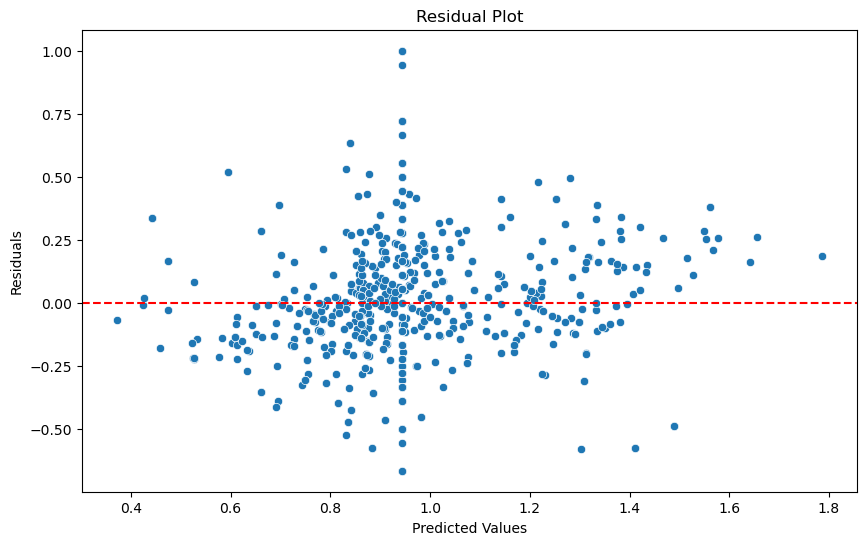

In [224]:
#Residual Analysis plot the errors between predicted and actual values
residuals = y_testRead-y_rf_predRead
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_rf_predRead, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



ACT Math 


In [225]:
actMath_11_df.head(10)

,studentId,is_proficient,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,course_ARMY LET II,course_ARMY LET III,course_ARMY LET IV,course_ARMYLETIVACT,course_AcAdv.Baseba,course_AcAdv.Basket,course_AcAdv.CrossC,course_AcAdv.Footb,course_AcAdv.Softba,course_AcAdv.Volley,course_Accounting,course_Adv BTA,course_Advanced Agr,course_Agriscience,course_Alg Esntls B,course_Alg II/Trig,course_AlgEnrichmet,course_AlgII/TrigAC,course_Algebra I,course_Algebra I A,course_Algebra I B,course_Algebra II,course_AlgebraicCon,course_Anat/Physio,course_Anthropology,course_Art App,course_BAND MARCH,course_BANDCONCERT,course_BANDMARCHAUX,course_BIOLOGY ADV,course_Bak & Pstr A,course_BandConcer.5,course_BandConcer1C,course_BandMarch.5C,course_BandSymph 1C,course_Biology,course_Biology Adv,course_BullBogAdv,course_BulldogAdvi,course_Bus Finance,course_Bus Tech App,course_CABINETMAK I,course_CABINETMAKII,course_Cabntmkng I,course_Cabntmkng II,course_Career Prep,course_CareerPrep-A,course_CareerPrep-B,course_Chemistry,course_ChemistryAdv,course_Const Fin In,course_Const Frmng,course_ContempIss1C,course_Crea Writing,course_CreatWrt.5C,course_Credit Recov,course_Culinary I,course_Culinary II,course_D&TSafetyEd,course_DRIVERS ED,course_Dance 9-12,course_Digitl Dsgn,course_ESLEnrich912,course_ESLLang9-12,course_Ear/SpaceSci,course_Eng Ess 10,course_Eng Ess 11,course_Eng Gr10 Adv,course_EngGr9-CR,"course_EngLang,BS10",course_EnglGr10ACCE,course_English Gr 9,course_English Gr10,course_English Gr11,course_Enrichmt6-12,course_Enviro Sci,course_Ess II:USHis,course_Ess: E & SS,course_Ess: Phy Sci,course_EssIII:USHis,course_EssPhySci,course_EventPlan,course_FACS,course_FAM CON SC,course_Fit Life .5C,course_Fit/Cond,course_Food Inno,course_Food Nutritn,course_For/Cri Inve,course_Forestry,course_Found AAVTC,course_FrenchIACCE,course_Fund Agrisci,course_GEOM ADV,course_Geo Ess,course_Geometry,course_Geometry Adv,course_GeometryACCE,course_German1ACCES,course_Guitar,course_HEALTH 9-12,course_HEALTH ACCES,course_HISTUS1877AC,course_HS US 10 ADV,course_Health 9-12,course_HealthACCESS,course_Hosp Tourism,course_INFO SUP SVC,course_IT Fndamntls,course_IT Supp/Serv,course_Inet Mktg,course_Int Ad Desgn,course_Int Metl Fab,course_Inter Drftng,course_Intermed Agr,course_Intr Fire Sc,course_Intro Drftng,course_Jazz 1C,course_Journal1ACC,course_Journalism 1,course_LATIN 1 ACC,course_LAW IN SOCIE,course_LIFE PE 9-12,course_LIFEPE9-12.5,course_MARKET PRIN,course_MarchAux.5C,course_MarchAux1C,course_Marine Sci,course_Mktng Prin,course_Mnt Lt Rpr A,course_Mnt Lt Rpr B,course_Multimed Des,course_Multimed Pub,course_Music App,course_MusicTheatre,course_MusicTherI.5,course_MusicThry AP,course_MusicalDrama,course_Mustang Advi,course_NCCER ET1,course_NCCER ET2,course_NCCER Wldg1,course_NCCER Wldg2,course_Painting,course_Panther Adv,course_Per Finance,course_Percuss 1C,course_Phy Sci Adv,course_PhySciACCESS,course_Physical Sci,course_Piano .5C,course_Plumb/Pipe I,course_Plumb/PipeII,course_Prn Pub Serv,course_Psyc AP Acc,course_PsychACCESS,course_Psycholog.5C,course_Psychology,course_R/DinPhysics,course_RdIntrv7-12,course_Robotics App,course_SPAN II ACCE,course_SPANISH I,course_SPANISH II,course_Sociology,course_SociologyACC,course_Span2ACCESS,course_SpanIACC,course_Spanish 1,course_Spanish 2,course_Spanish 3,course_Speech 1,course_Spo&En Mktg,course_StuAiOff912,course_StudyHall912,course_TA-Partridge,course_Tech Theater,course_Theatre I,course_Theatre II,course_TmSpts,course_TmSpts-Dance,course_Tran Serv I,course_Tran Serv II,course_TranSer 11,course_TranSer El.5,course_TranSer10,course_Travl Tour I,course_US His-1877,course_USHis 1877-P,course_USHis I Adv,course_USHis I G10,course_USHis InD-P,course_USHisIG10ACC,course_VarBkbalI,course_VarBkbalII,course_VarBsbalI,course_VarBsbalII,course_VarBsblIV,course_VarCheerII,course_VarFBI,course_VarFBII,course

In [226]:
actMath_11_df[actMath_11_df.select_dtypes(include=['bool']).columns] = actMath_11_df.select_dtypes(include=['bool']).astype(int)
actMath_11_df.dtypes


studentId                 int64
is_proficient             int32
proficient_score        float64
course_ACT Review         int32
course_ACT/WK Rev.        int32
course_ACTReview.5C       int32
course_AG Communica       int32
course_AIDE-ELEM          int32
course_AIDE-LIB           int32
course_ALG I B ACCE       int32
course_ALIITRIGH/A        int32
course_ARMY LET I         int32
course_ARMY LET II        int32
course_ARMY LET III       int32
course_ARMY LET IV        int32
course_ARMYLETIVACT       int32
course_AcAdv.Baseba       int32
course_AcAdv.Basket       int32
course_AcAdv.CrossC       int32
course_AcAdv.Footb        int32
course_AcAdv.Softba       int32
course_AcAdv.Volley       int32
course_Accounting         int32
course_Adv BTA            int32
course_Advanced Agr       int32
course_Agriscience        int32
course_Alg Esntls B       int32
course_Alg II/Trig        int32
course_AlgEnrichmet       int32
course_AlgII/TrigAC       int32
course_Algebra I          int32
course_A

In [251]:
actMath_11_df.columns

Index(['studentId', 'is_proficient', 'proficient_score', 'course_ACT Review',
       'course_ACT/WK Rev.', 'course_ACTReview.5C', 'course_AG Communica',
       'course_AIDE-ELEM', 'course_AIDE-LIB', 'course_ALG I B ACCE',
       ...
       'course_YearbkII9-12', 'course_Yearbook9-12', 'course_YrbkIII9-12',
       'school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading',
       'bbb_literacy'],
      dtype='object', length=241)

In [227]:
#training
y_Math= actMath_11_df['proficient_score']
X_Math= actMath_11_df.drop(['proficient_score', 'is_proficient', 'studentId'], axis=1)
print("Number of examples: " + str(X_Math.shape[0]))
X_train_Math,X_test_Math, y_train_Math,y_test_Math = train_test_split(X_Math,y_Math, test_size=0.33,stratify=actMath_11_df['is_proficient'], random_state=123)
print(X_train_Math.shape)
print(X_test_Math.shape)

Number of examples: 2580
(1728, 238)
(852, 238)


In [228]:
max_depth_values_math = [5,18,23,32]
n_estimators_value_math = [100,250,300,350]
param_grid38 = {'max_depth' : list(max_depth_values_math), 'n_estimators' : list(n_estimators_value_math)}

In [229]:
#Grid Search to find the best hyperparameters 
'''
print("Running Grid Search")
rf_regressorMath = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_gridMath = GridSearchCV(rf_regressorMath, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_searchMath = rf_gridMath.fit(X_train, y_train)

print("Done")
rf_best_paramsMath = rf_grid_searchMath.best_params_

rf_best_paramsMath
'''

'\nprint("Running Grid Search")\nrf_regressorMath = RandomForestRegressor()\n\n# will have a 3-fold cross validation \nrf_gridMath = GridSearchCV(rf_regressorMath, param_grid, cv=3, scoring=\'neg_root_mean_squared_error\')\nrf_grid_searchMath = rf_gridMath.fit(X_train, y_train)\n\nprint("Done")\nrf_best_paramsMath = rf_grid_searchMath.best_params_\n\nrf_best_paramsMath\n'

In [230]:
print('Begin Random Forest ')
rf_model_Math = RandomForestRegressor(max_depth=32, n_estimators=350)
rf_model_Math.fit(X_train_Math,y_train_Math)
print('End')

Begin Random Forest 
End


In [231]:
y_rf_pred_Math = rf_model_Math.predict(X_test_Math)
rf_rmse_Math = mean_squared_error(y_test_Math, y_rf_pred_Math, squared=False)
rf_r2_Math = r2_score(y_test_Math, y_rf_pred_Math)

#trying to get f1 and accuracy score 
threshold = 1
y_rf_predMath_bool = y_rf_pred_Math >= threshold
y_test_Math_bool = y_test_Math >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_Math_bool, y_rf_predMath_bool))
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))        

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.95      0.85       543
        True       0.86      0.48      0.61       309

    accuracy                           0.78       852
   macro avg       0.81      0.72      0.73       852
weighted avg       0.80      0.78      0.76       852

[RF] Root Mean Squared Error: 0.23623902355413343
[RF] R2: 0.4401505523499831


In [232]:
#feature importance
importances_Math = rf_model_Math.feature_importances_
feature_names_Math = X_train_Math.columns

# Combine names and importances, and sort
importance_df_Math = pd.DataFrame({'Feature': feature_names_Math, 'Importance': importances_Math})
importance_df_Math = importance_df_Math.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
importance_df_Math.head(10)

,Feature,Importance
58,course_ChemistryAdv,0.251016
84,course_Enviro Sci,0.040751
156,course_Phy Sci Adv,0.027982
76,course_Eng Gr10 Adv,0.019746
177,course_Spanish 1,0.019212
29,course_Algebra I B,0.018232
128,course_Journalism 1,0.015452
40,course_BandConcer.5,0.014707
131,course_LIFE PE 9-12,0.012631
140,course_Multimed Des,0.012023


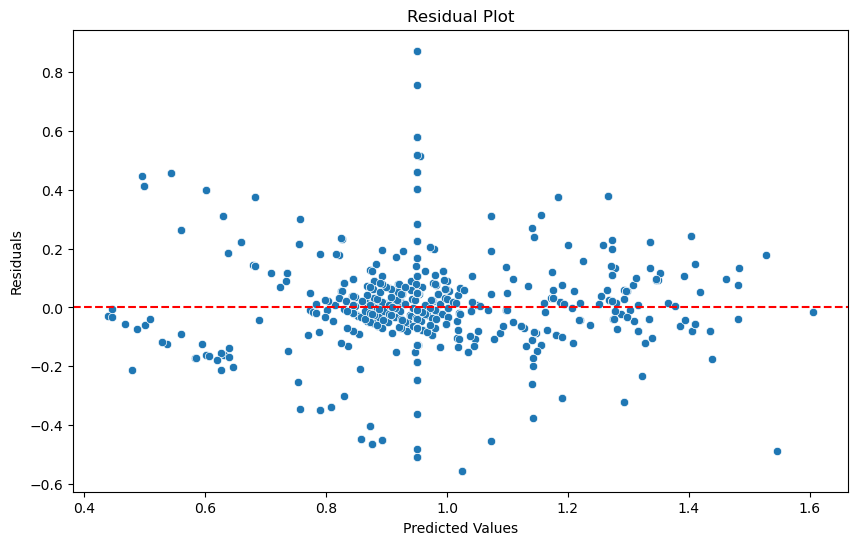

In [233]:
#Residual Analysis plot the errors between predicted and actual values
residuals_Math = y_test_Math-y_rf_pred_Math
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_rf_pred_Math, y=residuals_Math)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Act_Math Encoded

In [234]:
actMath_11_encoded_df.head()

,studentId,is_proficient,proficient_score,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy,category_MATHEMATICS,category_ENGLISH,category_SCIENCE,category_SOCIAL_STUDIES,category_FOREIGN_LANGUAGE,category_PERFORMING_ARTS,category_VISUAL_ARTS,category_TECHNOLOGY,category_BUSINESS,category_TRADES,category_AGRICULTURE,category_PHYSICAL_EDUCATION,category_HEALTH,category_CAREER_PREP,category_MILITARY_SCIENCE
0,45054,False,0.264706,True,False,False,False,0,0,0,1,0,1,0,0,False,False,False,False,True,False,False,False,False,False
1,45054,False,0.264706,True,False,False,False,0,0,0,1,0,1,0,0,False,False,False,False,True,False,False,False,False,False
2,45440,False,0.941176,False,False,False,False,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False
3,45440,False,0.941176,False,False,False,False,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False
4,45440,False,0.941176,False,False,False,False,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False


In [250]:
actMath_11_encoded_df.columns

Index(['studentId', 'is_proficient', 'proficient_score',
       'school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading', 'bbb_literacy',
       'category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE',
       'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE',
       'category_PERFORMING_ARTS', 'category_VISUAL_ARTS',
       'category_TECHNOLOGY', 'category_BUSINESS', 'category_TRADES',
       'category_AGRICULTURE', 'category_PHYSICAL_EDUCATION',
       'category_HEALTH', 'category_CAREER_PREP', 'category_MILITARY_SCIENCE'],
      dtype='object')

In [235]:
#turning bools into ints
actMath_11_encoded_df[actMath_11_encoded_df.select_dtypes(include=['bool']).columns] = actMath_11_encoded_df.select_dtypes(include=['bool']).astype(int)
actMath_11_encoded_df.dtypes

studentId                        int64
is_proficient                    int32
proficient_score               float64
school_High School A             int32
school_High School B             int32
school_High School C             int32
school_High School D             int32
iready_math                      int64
iready_reading                   int64
bbb_literacy                     int64
category_MATHEMATICS             int64
category_ENGLISH                 int64
category_SCIENCE                 int64
category_SOCIAL_STUDIES          int64
category_FOREIGN_LANGUAGE        int64
category_PERFORMING_ARTS         int32
category_VISUAL_ARTS             int32
category_TECHNOLOGY              int32
category_BUSINESS                int32
category_TRADES                  int32
category_AGRICULTURE             int32
category_PHYSICAL_EDUCATION      int32
category_HEALTH                  int32
category_CAREER_PREP             int32
category_MILITARY_SCIENCE        int32
dtype: object

In [236]:
#training
y_Math_encoded = actMath_11_encoded_df['proficient_score']
X_Math_encoded= actMath_11_encoded_df.drop(['proficient_score', 'is_proficient', 'studentId'], axis=1)
print("Number of examples: " + str(X_Math_encoded.shape[0]))
X_train_Math_encoded,X_test_Math_encoded, y_train_Math_encoded,y_test_Math_encoded = train_test_split(X_Math_encoded,y_Math_encoded, test_size=0.33,stratify= actMath_11_encoded_df['is_proficient'], random_state=123)
print(X_train_Math_encoded.shape)
print(X_test_Math_encoded.shape)

Number of examples: 2580
(1728, 22)
(852, 22)


In [237]:
#hyperparameters
max_depth_values_math = [5,18,23,32]
n_estimators_value_math = [100,250,300,350]
param_grid38 = {'max_depth' : list(max_depth_values_math), 'n_estimators' : list(n_estimators_value_math)}

#Grid Search to find the best hyperparameters 

print("Running Grid Search")
rf_regressor_Math_encoded= RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid_Math_encoded = GridSearchCV(rf_regressor_Math_encoded, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search_Math_encoded = rf_grid_Math_encoded.fit(X_train_Math_encoded, y_train_Math_encoded)

print("Done")
rf_best_params_Math_encoded = rf_grid_search_Math_encoded.best_params_

rf_best_params_Math_encoded
#{'max_depth': 32, 'n_estimators': 250}

Running Grid Search
Done


{'max_depth': 23, 'n_estimators': 100}

In [238]:
print('Begin Random Forest ')
rf_model_Math_encoded = RandomForestRegressor(max_depth=32, n_estimators=250)
rf_model_Math_encoded.fit(X_train_Math_encoded,y_train_Math_encoded)
print('End')

y_rf_pred_Math_encoded = rf_model_Math_encoded.predict(X_test_Math_encoded)
rf_rmse_Math_encoded = mean_squared_error(y_test_Math_encoded, y_rf_pred_Math_encoded, squared=False)
rf_r2_Math_encoded= r2_score(y_test_Math_encoded, y_rf_pred_Math_encoded)

#trying to get f1 and accuracy score 
threshold = 1
y_pred_Math_encoded_bool = y_rf_pred_Math_encoded >= threshold
y_test_Math_encoded_bool = y_test_Math_encoded >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_Math_encoded_bool, y_pred_Math_encoded_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse_Math_encoded))
print('[RF] R2: {0}'.format(rf_r2_Math_encoded))     

Begin Random Forest 
End
threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.93      0.84       543
        True       0.80      0.49      0.61       309

    accuracy                           0.77       852
   macro avg       0.78      0.71      0.72       852
weighted avg       0.78      0.77      0.75       852

[RF] Root Mean Squared Error: 0.18863065344346255
[RF] R2: 0.3508448702728215


In [239]:
#feature importance 
importances_Math_encoded = rf_model_Math_encoded.feature_importances_
feature_names_Math_encoded = X_train_Math_encoded.columns

# Combine names and importances, and sort
importance_Math_encoded_df = pd.DataFrame({'Feature': feature_names_Math_encoded, 'Importance': importances_Math_encoded})
importance_Math_encoded_df = importance_Math_encoded_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
importance_Math_encoded_df.head(10)

,Feature,Importance
8,category_ENGLISH,0.227585
10,category_SOCIAL_STUDIES,0.118884
9,category_SCIENCE,0.086440
7,category_MATHEMATICS,0.064391
11,category_FOREIGN_LANGUAGE,0.059926
18,category_PHYSICAL_EDUCATION,0.049762
12,category_PERFORMING_ARTS,0.048007
13,category_VISUAL_ARTS,0.042738
17,category_AGRICULTURE,0.037483
21,category_MILITARY_SCIENCE,0.036649


Scantron Reading using proficient_score as label

In [240]:
scantron_reading38.head()


,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronReading,False,0.993342,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.969279
1,44783,7,value_scantronReading,False,0.997179,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False

In [241]:
scantron_reading38[scantron_reading38.select_dtypes(include=['bool']).columns] = scantron_reading38.select_dtypes(include=['bool']).astype(int)
scantron_reading38.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                     int32
proficient_score                float64
course_AIDELIB7-8NC               int32
course_AIDSTU6-12NC               int32
course_ARTHIS7-8                  int32
course_Advisory 5                 int32
course_Advisory 6                 int32
course_Advisory 7                 int32
course_Advisory 7-8               int32
course_Advisory 8                 int32
course_Aide Off 7-8               int32
course_BAND 6                     int32
course_BAND 7 Brass               int32
course_BAND 7 Percu               int32
course_BAND 7 Wood                int32
course_BROADCAS 7-8               int32
course_Band 7                     int32
course_Band7                      int32
course_BandGuitar78               int32
course_CONTISSU 7-8               int32
course_CREAWRT 7-8                int32
course_CSElec Gr7-8               int32


In [249]:
scantron_reading38.columns

Index(['studentId', 'level', 'dataSource', 'is_proficient', 'proficient_score',
       'course_AIDELIB7-8NC', 'course_AIDSTU6-12NC', 'course_ARTHIS7-8',
       'course_Advisory 5', 'course_Advisory 6',
       ...
       'school_Elementary School F', 'school_Intermediate School E',
       'school_Middle School A', 'school_Middle School C',
       'school_Middle School D', 'school_Middle School F', 'iready_math',
       'iready_reading', 'bbb_literacy', 'past_proficient_score'],
      dtype='object', length=142)

In [242]:
print(scantron_reading38.isnull().sum())  

studentId                          0
level                              0
dataSource                         0
is_proficient                      0
proficient_score                   0
course_AIDELIB7-8NC                0
course_AIDSTU6-12NC                0
course_ARTHIS7-8                   0
course_Advisory 5                  0
course_Advisory 6                  0
course_Advisory 7                  0
course_Advisory 7-8                0
course_Advisory 8                  0
course_Aide Off 7-8                0
course_BAND 6                      0
course_BAND 7 Brass                0
course_BAND 7 Percu                0
course_BAND 7 Wood                 0
course_BROADCAS 7-8                0
course_Band 7                      0
course_Band7                       0
course_BandGuitar78                0
course_CONTISSU 7-8                0
course_CREAWRT 7-8                 0
course_CSElec Gr7-8                0
course_CareerPrep-A                0
course_CareerPrepA5                0
c

In [243]:
scantron_reading38 = scantron_reading38.dropna(subset=['past_proficient_score'])
print(scantron_reading38.isnull().sum())  

studentId                       0
level                           0
dataSource                      0
is_proficient                   0
proficient_score                0
course_AIDELIB7-8NC             0
course_AIDSTU6-12NC             0
course_ARTHIS7-8                0
course_Advisory 5               0
course_Advisory 6               0
course_Advisory 7               0
course_Advisory 7-8             0
course_Advisory 8               0
course_Aide Off 7-8             0
course_BAND 6                   0
course_BAND 7 Brass             0
course_BAND 7 Percu             0
course_BAND 7 Wood              0
course_BROADCAS 7-8             0
course_Band 7                   0
course_Band7                    0
course_BandGuitar78             0
course_CONTISSU 7-8             0
course_CREAWRT 7-8              0
course_CSElec Gr7-8             0
course_CareerPrep-A             0
course_CareerPrepA5             0
course_CivicH/Adv 7             0
course_CivicsGr 7               0
course_ContIss

In [244]:
y_38 = scantron_reading38['proficient_score']
X_38 = scantron_reading38.drop(['proficient_score','studentId', 'dataSource','is_proficient'], axis = 1)
print("Number of examples: " + str(X_38.shape[0]))

X_train38,X_test38, y_train38,y_test38 = train_test_split(X_38,y_38, test_size=0.33,stratify = scantron_reading38['is_proficient'], random_state=123)
print(X_train38.shape)
print(X_test38.shape)

Number of examples: 15180
(10170, 138)
(5010, 138)


In [245]:
#setting up the param grid, possible hyperparameter for max_depth and n_estimators:The number of trees in the forest.
max_depth_values38 = [5,18,23,32]
n_estimators_value38 = [100,250,300,350]
param_grid38 = {'max_depth' : list(max_depth_values38), 'n_estimators' : list(n_estimators_value38)}

In [246]:
#Grid Search to find the best hyperparameters 
'''
print("Running Grid Search")
rf_regressor38 = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid38 = GridSearchCV(rf_regressor38, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search38 = rf_grid38.fit(X_train38, y_train38)

print("Done")
rf_best_params38 = rf_grid_search38.best_params_

rf_best_params38

#{'max_depth': 32, 'n_estimators': 300}

'''

'\nprint("Running Grid Search")\nrf_regressor38 = RandomForestRegressor()\n\n# will have a 3-fold cross validation \nrf_grid38 = GridSearchCV(rf_regressor38, param_grid, cv=3, scoring=\'neg_root_mean_squared_error\')\nrf_grid_search38 = rf_grid38.fit(X_train38, y_train38)\n\nprint("Done")\nrf_best_params38 = rf_grid_search38.best_params_\n\nrf_best_params38\n\n#{\'max_depth\': 32, \'n_estimators\': 300}\n\n'

In [247]:
print('Begin Random Forest ')
rf_model38 = RandomForestRegressor(max_depth=32, n_estimators=350)
rf_model38.fit(X_train38,y_train38)
print('End')

Begin Random Forest 
End


In [248]:
y_rf_pred38 = rf_model38.predict(X_test38)
rf_rmse38 = mean_squared_error(y_test38, y_rf_pred38, squared=False)
rf_r2_38 = r2_score(y_test38, y_rf_pred38)
#trying to get f1 and accuracy score 
threshold = 1
y_pred38_bool = y_rf_pred38 >= threshold
y_test38_bool = y_test38 >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test38_bool, y_pred38_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))        

#Random Forest so much better than DT

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      3090
        True       0.82      0.77      0.79      1920

    accuracy                           0.85      5010
   macro avg       0.84      0.83      0.84      5010
weighted avg       0.85      0.85      0.85      5010

[RF] Root Mean Squared Error: 0.23623902355413343
[RF] R2: 0.4401505523499831
